In [9]:
import pandas as pd

df = pd.read_csv('test.csv', encoding='unicode_escape')


In [10]:
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_review=df[['textID','text','sentiment']]
df_review

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
4810,NaN,NaN,NaN
4811,NaN,NaN,NaN
4812,NaN,NaN,NaN
4813,NaN,NaN,NaN


<Axes: xlabel='sentiment'>

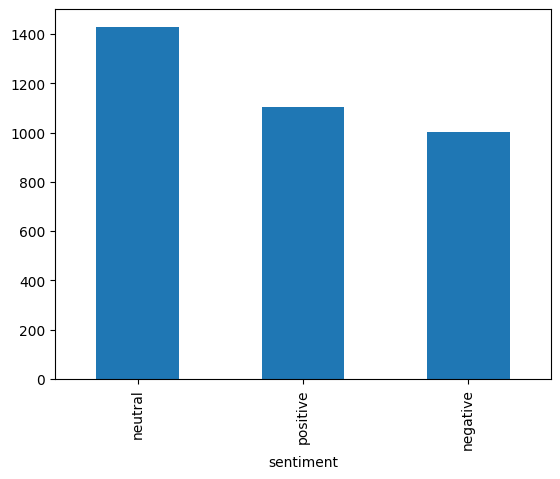

In [12]:
df_review.value_counts('sentiment').plot(kind='bar')


In [13]:
df_review.value_counts('sentiment')

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64

In [14]:
df_review.isnull().sum().sort_values(ascending=False)

textID       1281
text         1281
sentiment    1281
dtype: int64

In [15]:
df_review = df_review.dropna()


In [16]:
df_review.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [17]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

df_bal,df_bal['sentiment']=rus.fit_resample(df_review[['text']], df_review['sentiment'])

<Axes: xlabel='sentiment'>

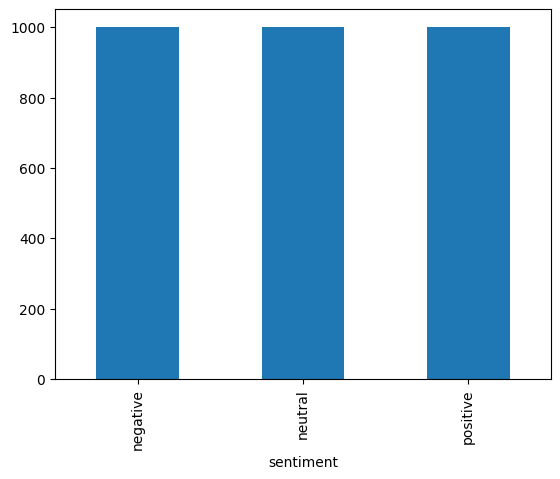

In [18]:
df_bal.value_counts('sentiment').plot(kind='bar')

In [19]:
# import train_test_split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_bal, test_size=0.33,
                               random_state=42)

In [20]:
train_x, train_y = train['text'], train['sentiment']
test_x, test_y = test['text'], test['sentiment']

In [21]:
train_x
print(train_y.value_counts(),test_y.value_counts())

sentiment
neutral     680
positive    673
negative    659
Name: count, dtype: int64 sentiment
negative    342
positive    328
neutral     321
Name: count, dtype: int64


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

In [23]:
test_x_vector = tfidf.transform(test_x)

In [24]:
train_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12888 stored elements and shape (2012, 4650)>

In [25]:
test_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4664 stored elements and shape (991, 4650)>

In [26]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,00pm,053agj,09,0930,0s,0wvnpj,0xoxij,0zr2jqj,10,...,â½,â½50,â½al,â½m,â½n,â½s,â½t,â½tition,â½we,â½ã
3100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Selection

## Support Vector Machines (SVM)

In [27]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [28]:
print(svc.predict(tfidf.transform(['A good place'])))
print(svc.predict(tfidf.transform(['An excellent place'])))
print(svc.predict(tfidf.transform(['I did not like this place it was horrible experience'])))
print(svc.predict(tfidf.transform(['it was ok'])))
print(svc.predict(tfidf.transform(['last session of the day'])))

['positive']
['positive']
['negative']
['neutral']
['neutral']


## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

In [33]:
# calculate confusion matrix of svc
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y,
                 svc.predict(test_x_vector),
                 labels=['positive', 'negative'])              #tp fn
                                                               #fp   tn

array([[214,  22],
       [ 24, 203]], dtype=int64)

In [34]:
# calculate accuracy of all models

print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))


# model.score(test_x_vector, test_y)

0.6145307769929365
0.5903128153380424
0.47325933400605447
0.6236125126135217


## F1 Score

In [35]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.68261563, 0.63937008])

In [36]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                      svc.predict(test_x_vector),
                      labels=['positive', 'negative'])) 

              precision    recall  f1-score   support

    positive       0.72      0.65      0.68       328
    negative       0.69      0.59      0.64       342

   micro avg       0.70      0.62      0.66       670
   macro avg       0.70      0.62      0.66       670
weighted avg       0.70      0.62      0.66       670

